# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
# ?? Надо сравнить с воронцовым это решение
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [1]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [1]:
import pandas as pd
adver_data = pd.read_csv('adv_table.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [2]:
#Идея такая, может попробывать описывать эти решения для себя и коментировать их. 
# Тут нужно вывести первые 5 записей
print(adver_data.shape)
adver_data.head()

(200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


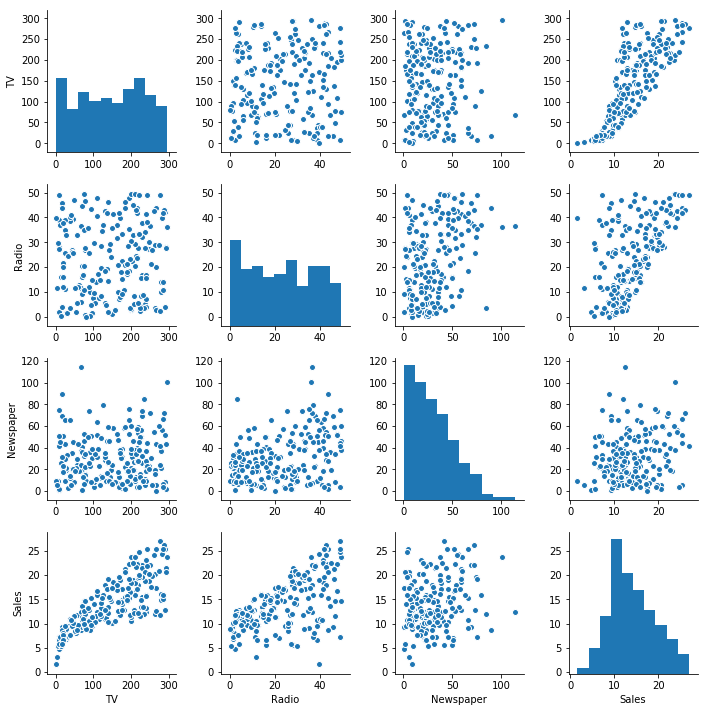

In [3]:
# А тут посмотреть статистику.

import seaborn as sns;
import matplotlib.pyplot as plt

sns.pairplot(adver_data)
plt.show()

In [40]:
adver_data.corr()
# Indeed, using correlation its possible to see lows of how TV radio and newspapers influence to sales.

,TV,Radio,Newspaper,Sales,bias
TV,1.000000,0.054809,0.056648,0.782224,NaN
Radio,0.054809,1.000000,0.354104,0.576223,NaN
Newspaper,0.056648,0.354104,1.000000,0.228299,NaN
Sales,0.782224,0.576223,0.228299,1.000000,NaN
bias,NaN,NaN,NaN,NaN,NaN


**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [5]:
X = adver_data[['TV', 'Radio', 'Newspaper']].values # Ваш код здесь
y = adver_data.Sales# Ваш код здесь

print(X[1:2])
print(y[1:2])

[[ 44.5  39.3  45.1]]
2    10.4
Name: Sales, dtype: float64


**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [34]:
# Возможны разны варианты нормировки данных. Более того, мне не нравится предложенный тут вариант, так как "теряется" 
# контроль за матрицами - в пандасе все столбцы известны, и их можно удобно нормировать. 

# Кроме того, можно сравнить как это будет работать на различных нормировках - std и min max. 
#means, stds = # Ваш код здесь
for c in adver_data.columns:
    mean, std = adver_data[c].mean(), adver_data[c].std()
    adver_data[c]=(adver_data[c] - mean)/std
adver_data.head()

,TV,Radio,Newspaper,Sales,bias
1,0.967425,0.979066,1.774493,1.548168,NaN
2,-1.194379,1.080097,0.667903,-0.694304,NaN
3,-1.512360,1.524637,1.779084,-0.905135,NaN
4,0.051919,1.214806,1.283185,0.858177,NaN
5,0.393196,-0.839507,1.278593,-0.215143,NaN


In [14]:
#X = # Ваш код здесь
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(adver_data), columns=['TV', 'Radio', 'Newspaper', 'Sales']).head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [35]:
# Столбец из едениц удобнее тоже через пандас делать 
#import numpy as np
#X = np.hstack # Ваш код здесь
adver_data['bias'] = 1
adver_data.head(2)

,TV,Radio,Newspaper,Sales,bias
1,0.967425,0.979066,1.774493,1.548168,1
2,-1.194379,1.080097,0.667903,-0.694304,1


**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [36]:
# Этот же mse error можно сравнить с пакетом. scikit-le
import numpy as np
def mserror(y, y_pred):
    return ((y-y_pred)**2).sum()/len(y_pred)
    
print(mserror(np.array([1, 2, 3]), np.array([0.8, 1.97, 2.99])))
print(mserror(np.array([1, 2, 3]), np.array([0.9, 1.97, 2.99])))
print(mserror(np.array([1, 2, 3]), np.array([0.99, 1.97, 2.99])))
print(mserror(np.array([1, 2, 3]), np.array([0.99, 1.99, 2.99])))
print(mserror(np.array([1, 2, 3]), np.array([0.99999, 1.999999, 2.999999])))

0.0136666666667
0.00366666666667
0.000366666666667
0.0001
3.39999999997e-11


In [37]:
print(adver_data.Sales.quantile(q=0.50))
print(adver_data.median(axis=0))



-0.21514314223086323
TV           0.031536
Radio       -0.024517
Newspaper   -0.220583
Sales       -0.215143
bias         1.000000
dtype: float64


**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [38]:
res1 = adver_data.Sales.quantile(q=0.50)
print("Mean sales ", res1)
answer1 = mserror(res1, adver_data.Sales)
print("Mean sales error ", answer1)

Mean sales  -0.21514314223086323
Mean sales error  1.04128657165


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [39]:
def normal_equation(X, y):
    a = np.dot(X.T, X)
    print(a.shape)
    b = np.dot(X.T, y)
    print(b.shape)
    res = np.linalg.solve(a, b)
    return res
#    return np.linalg.inv  # Ваш код здесь

FeatureMatrix = adver_data[['TV', 'Radio', 'Newspaper', 'bias']].values
TargetMatrix  = adver_data.Sales.values
norm_eq_weights= normal_equation(FeatureMatrix, TargetMatrix)
print(norm_eq_weights)

(4, 4)
(4,)
[  7.53065912e-01   5.36481550e-01  -4.33068629e-03  -4.63419562e-17]


In [42]:
y_pred = np.dot(FeatureMatrix, norm_eq_weights)
print(mserror(TargetMatrix, y_pred))

0.102275415012


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [52]:
# Ну тут понятно - средние значения - это как раз из нормальности признаков. это можно проверить
print(adver_data.TV.mean())

#answer2 = np.dot(np.array([0,0,0,1]).T, norm_eq_weights) # Ваш код здесь

print(np.dot(np.array([0,0,0,1]).T, norm_eq_weights), TargetMatrix.mean())
#write_answer_to_file(answer2, '2.txt')

1.28785870857e-16
-4.63419561864e-17 -1.86517468137e-16


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [50]:
def linear_prediction(X, w):
    return np.dot(X, w)
 
y_pred = linear_prediction(FeatureMatrix, norm_eq_weights)
print(mserror(TargetMatrix, y_pred))
#0.102275415012

0.102275415012


**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [ ]:
answer3 = # Ваш код здесь
print(answer3)
write_answer_to_file(answer3, '3.txt')

**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [53]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    N = X.shape[0]                   # всего обьектов (нормировка)
    x = X[train_ind]                 # текуший случайный k обьект 
    y_pred = linear_prediction(x, w) # предсказание для к случайного обьекта 
    rs = (y_pred - y[train_ind])     # регрессионый остаток для k обьекта 
    
    grad0 = 2.0/N*x[0]*rs
    grad1 = 2.0/N*x[1]*rs
    grad2 = 2.0/N*x[2]*rs
    grad3 = 2.0/N*x[3]*rs
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

In [85]:
def stochastic_gradient_step_v(X, y, w, train_ind, eta=0.01):
    N = X.shape[0]                   # всего обьектов (нормировка)
    x = X[train_ind]                 # текуший случайный k обьект 
    y_pred = linear_prediction(x, w) # предсказание для к случайного обьекта 
    rs = (y_pred - y[train_ind])     # регрессионый остаток для k обьекта 
    return  w - 2.0* eta/N*x*rs

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [86]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        new_w = stochastic_gradient_step_v(X, y, w, random_ind, eta)
        
        error = mserror(y, linear_prediction(X, new_w))
        errors.append(error)
        weight_dist = np.linalg.norm(w-new_w)
        w = new_w
        iter_num += 1
    print(weight_dist)            
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [80]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(FeatureMatrix, TargetMatrix, [1,1,1,1],
                                                                            max_iter=1e5)
print(stoch_grad_desc_weights)

0.000136600996919
[  7.58819805e-01   5.31841619e-01  -8.72251139e-03  -3.86243052e-04]
CPU times: user 2.99 s, sys: 29.8 ms, total: 3.02 s
Wall time: 3.02 s


In [87]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(FeatureMatrix, TargetMatrix, [1,1,1,1],
                                                                            max_iter=1e5)
print(stoch_grad_desc_weights)

0.000136600996919
[  7.58819805e-01   5.31841619e-01  -8.72251139e-03  -3.86243052e-04]
CPU times: user 3.02 s, sys: 26.6 ms, total: 3.04 s
Wall time: 3.17 s


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'MSE')

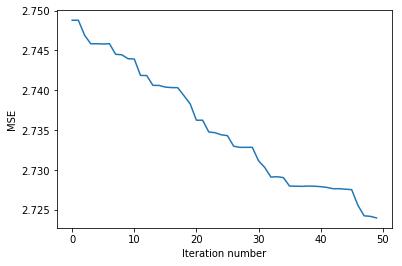

In [81]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'MSE')

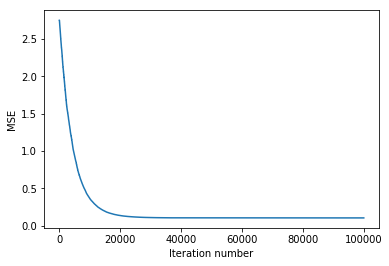

In [82]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [83]:
stoch_grad_desc_weights

array([  7.58819805e-01,   5.31841619e-01,  -8.72251139e-03,
        -3.86243052e-04])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [84]:
stoch_errors_by_iter[-1]

0.10235771790614936

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [ ]:
answer4 = # Ваш код здесь
print(answer4)
write_answer_to_file(answer4, '4.txt')

**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**

In [65]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [66]:
regressor.fit(FeatureMatrix, TargetMatrix)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [90]:
regressor.coef_

array([ 0.75306591,  0.53648155, -0.00433069,  0.        ])

In [76]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}